In [1]:
from numpy import genfromtxt, mean, linalg, allclose, diag, matrix, array, cos, sin, pi, sqrt, arcsin
from numpy.random import normal, random, uniform
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import cKDTree
from scipy.stats import special_ortho_group

In [2]:
data = genfromtxt('bunny.csv', delimiter=' ')

In [3]:
b = array([0, 0, -0.1])
xi = normal(0, 0.001, data.shape)

In [4]:
def rotation_x():
    theta = 40 * pi / 180
    return matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])

In [5]:
R = rotation_x()
source = array((R.dot(data.T)).T  + b.T + xi)

In [6]:
def visualize(source, result):
    fig = pyplot.figure(figsize=(10,10))
    ax = Axes3D(fig)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.scatter(-source[:,0], -source[:,2], source[:,1], c='b', s=20, marker='o')
    ax.scatter(-result[:,0], -result[:,2], result[:,1], c='r', s=20, marker='^')
    pyplot.show()

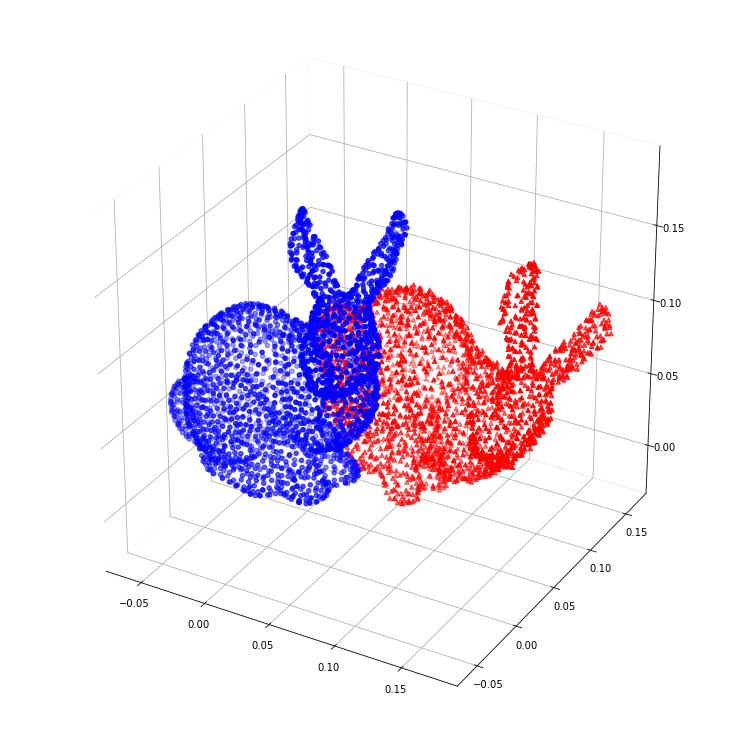

In [7]:
visualize(data, source)

In [8]:
tree = cKDTree(data)

def find_labeling(target, source):
    return target[tree.query(source)[1]]

In [9]:
def find_transformation(nearest_neighbours, source):
    centroid_target = mean(nearest_neighbours, axis=0)
    centroid_source = mean(source, axis=0)
    H = ((source - centroid_source).T).dot(nearest_neighbours - centroid_target)
    U, S, V = linalg.svd(H)
    R = ((V.T).dot(diag([1, 1, linalg.det((V.T).dot(U.T))]))).dot(U.T)
    t = centroid_target - R.dot(centroid_source.T).T
    print "R: ", R.T
    print "t: ", t
    return R.dot(source.T).T + t

In [ ]:
def icp(target, source, max_iterations=1000):
    labelings = []
    transformations = []
    labelings.append(find_labeling(target, source))
    transformations.append(find_transformation(labelings[0], source))
    i = 1
    print i
    visualize(data, transformations[-1])
    while (len(labelings) < 2 or not allclose(labelings[-1], labelings[-2])) and i < max_iterations:
        i += 1
        print i
        labelings.append(find_labeling(target, transformations[-1]))
        transformations.append(find_transformation(labelings[-1], source))
        visualize(data, transformations[-1])
    print 'Number of iterations:', i
    return transformations

R:  [[ 0.95010815 -0.23706299 -0.20272061]
 [ 0.25896863  0.96177435  0.08902448]
 [ 0.17386707 -0.13708116  0.97518152]]
t:  [ 0.03224167 -0.01189098  0.03869924]
1


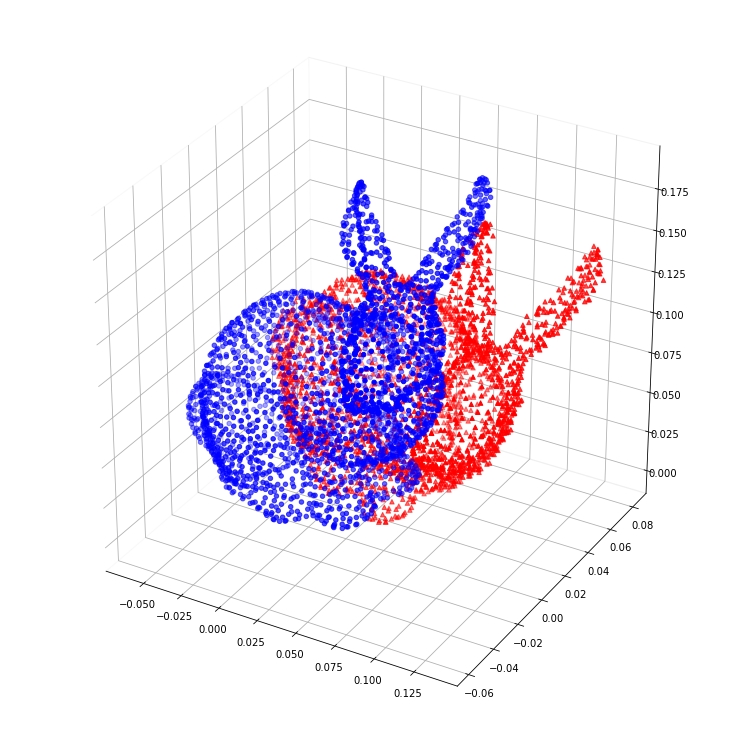

2
R:  [[ 0.92468052 -0.31982614 -0.20658456]
 [ 0.3473642   0.93080125  0.11378553]
 [ 0.15589758 -0.17697535  0.97178993]]
t:  [ 0.03168318 -0.01668283  0.04978903]


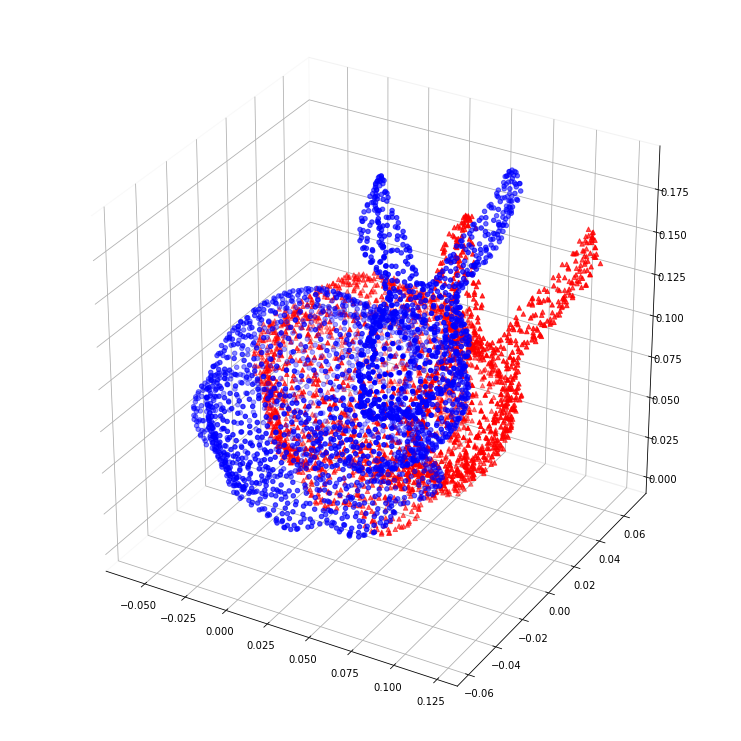

3
R:  [[ 0.91512102 -0.36328939 -0.1748552 ]
 [ 0.38864643  0.91024906  0.14283069]
 [ 0.10727291 -0.19866421  0.97417917]]
t:  [ 0.02802388 -0.0179266   0.059743  ]


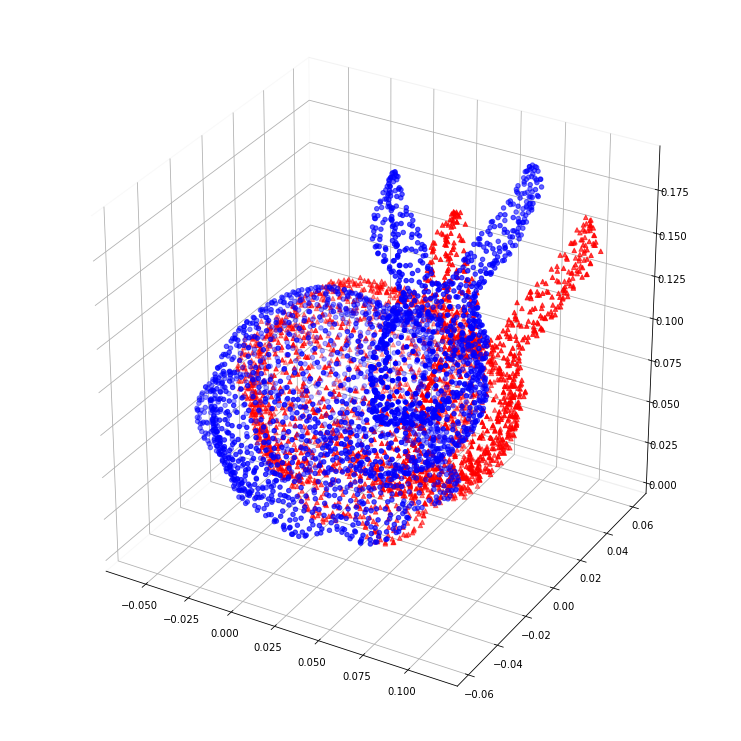

4
R:  [[ 0.90653608 -0.3957905  -0.1467727 ]
 [ 0.41700896  0.89365253  0.1657971 ]
 [ 0.06554287 -0.21150658  0.97517644]]
t:  [ 0.02472644 -0.01812835  0.06679252]


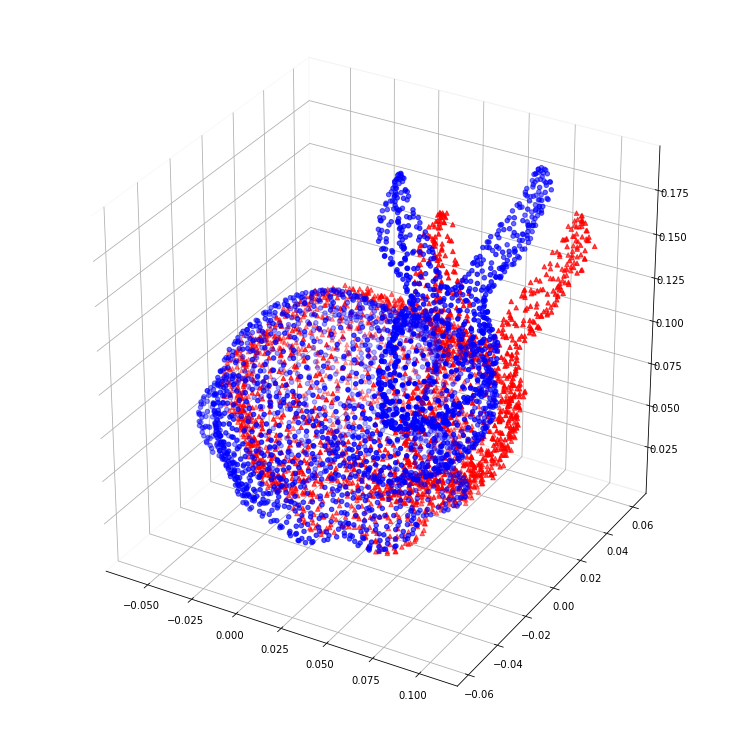

5
R:  [[ 0.89599233 -0.42655086 -0.12349941]
 [ 0.44277794  0.87933767  0.17525111]
 [ 0.03384417 -0.21170646  0.97674712]]
t:  [ 0.02168787 -0.01756376  0.07219083]


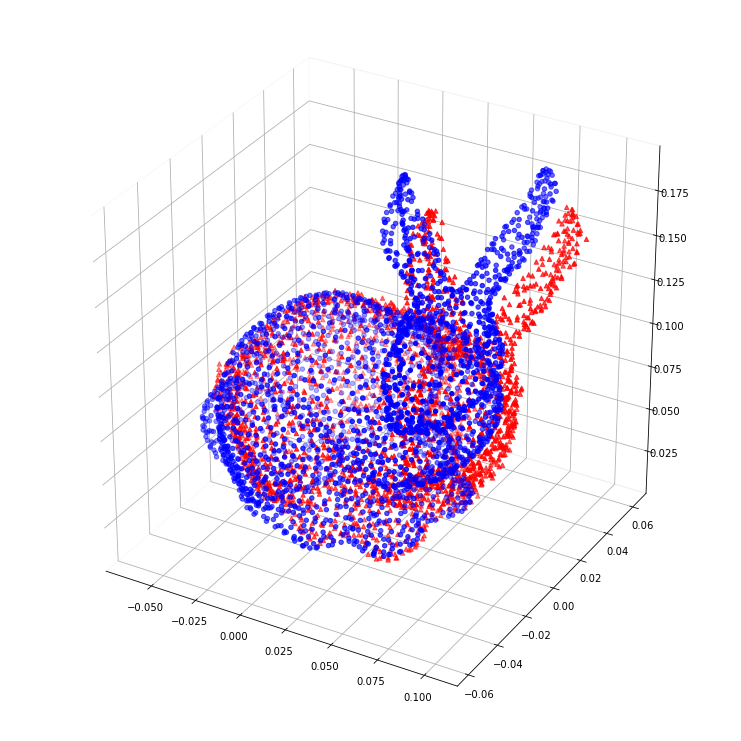

6
R:  [[ 0.88406836 -0.4554978  -0.10461781]
 [ 0.46725058  0.86622694  0.17699657]
 [ 0.01000122 -0.2053598   0.97863544]]
t:  [ 0.01886161 -0.0167335   0.07641611]


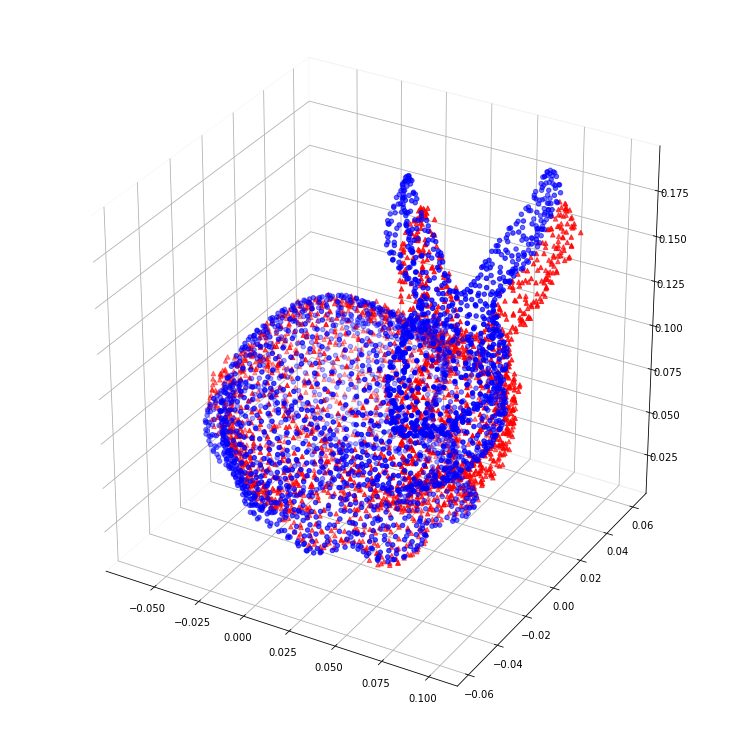

7
R:  [[ 0.87366558 -0.47855177 -0.08773063]
 [ 0.4864665   0.8563955   0.17302337]
 [-0.00766852 -0.19384257  0.98100268]]
t:  [ 0.01640341 -0.01553996  0.0798357 ]


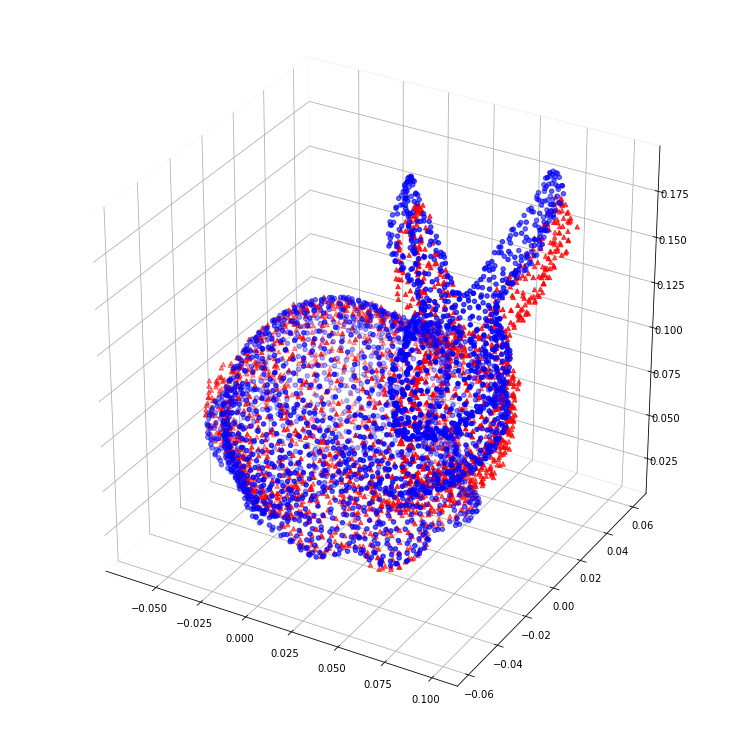

8
R:  [[ 0.86364425 -0.49855816 -0.07455443]
 [ 0.5037493   0.84801979  0.16461797]
 [-0.018848   -0.17972811  0.98353574]]
t:  [ 0.0142969  -0.01428686  0.0825799 ]


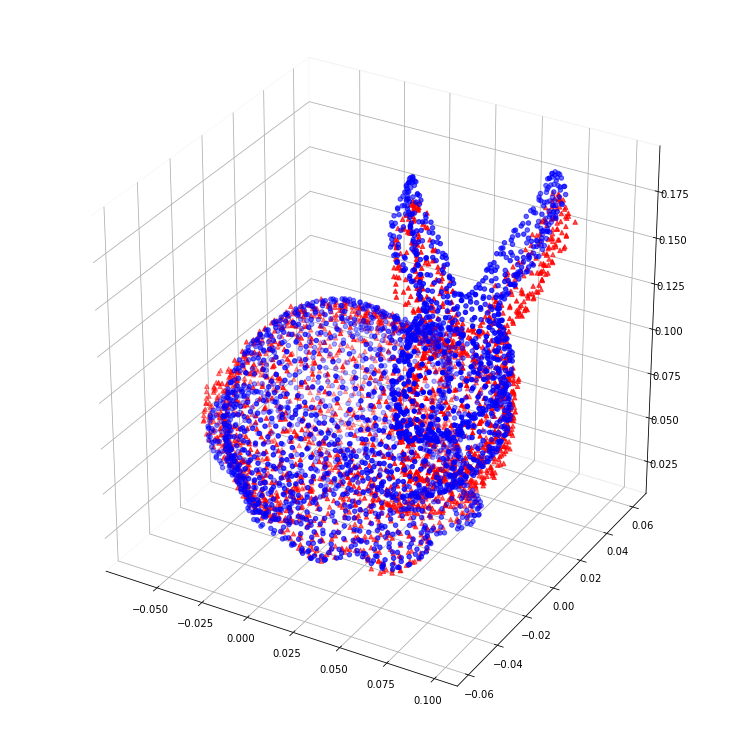

9
R:  [[ 0.85516089 -0.51447282 -0.06338424]
 [ 0.51772136  0.84161315  0.15379172]
 [-0.02577665 -0.16433204  0.98606823]]
t:  [ 0.01257115 -0.01294112  0.08490407]


In [ ]:
%%time
result = icp(data, source)[-1]

In [ ]:
visualize(data, result)